<a href="https://colab.research.google.com/github/Irene-kim/Cyberbullying-Detection-for-Women-/blob/master/codes)without_ELMo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import numpy as np
import pandas as pd
import os
import random
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import BatchNormalization, Dropout

import re
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense, LSTM, Bidirectional
from tensorflow.keras.models import Sequential
import tensorflow as tf
from keras import backend as K

from sklearn.metrics import roc_curve, roc_auc_score, auc


Using TensorFlow backend.


In [ ]:
# seed = 2, 42, 123, 1208, 1996
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

seed = 42
random.seed(seed) # Python
np.random.seed(seed) # numpy
# tf.random.set_seed(seed) # over Tensorflow 2.0
tf.set_random_seed(seed) # below Tensorflow
os.environ['PYTHONHASHSEED'] = str(seed)

In [ ]:
base_path = r'/content/gdrive/My Drive/Sk/categories'
file_path = os.path.join(base_path, "Cyberbullying.csv")
df = pd.read_csv(file_path)

In [ ]:
df = df[['Cyberbullying', 'Text']]
print(len(df))
df[:6]

7380


,Cyberbullying,Text
0,0,????????
1,0,Why these white girls SO salty in the comments...
2,0,Y these white ppl still on her ass like she??...
3,0,La jola??
4,0,follow me please I love your content please ????
5,0,Yesssssssssss bring it on baby girl


In [ ]:
def cleanText(text):
    text = text.strip().replace("\n", " ").replace("\r", " ")
    text = text.strip().replace('\x80', "").replace('\x80', "")
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'[,!@#$%^&*)(|/><";:.?\'\\}{]',"",text)
    text = text.lower()
    text = re.sub(r'(.)\1+', r'\1\1', text)
    text = re.sub("’", "'", text)
    return text

In [ ]:
df['Text'] = df['Text'].apply(cleanText)
filter = df['Text'] != ""
df = df[filter]
#df[50:60]

In [ ]:
df['Text'].nunique()

5100

In [ ]:
df.drop_duplicates(subset=['Text'], inplace=True)
#print(df.iloc[50:75])

In [ ]:
input_data = df['Text']
output_data = df['Cyberbullying']

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(input_data)
input_data = tokenizer.texts_to_sequences(input_data)
print(input_data)

[[53, 115, 490, 242, 12, 2046, 20, 2, 162, 4, 2047], [142, 115, 490, 444, 116, 22, 19, 143, 13, 90, 12, 251, 49, 1300, 9, 116, 445, 19, 1301, 5, 1302, 2048, 7], [91, 2049], [104, 21, 110, 4, 24, 8, 966, 110], [157, 321, 14, 22, 68, 36], [36, 1, 65, 5, 26, 967, 48, 822, 544, 18, 2050, 37, 823, 1303, 597, 98, 2051, 598, 6, 968, 48, 307, 196, 252, 16, 491, 8, 1304, 208, 2052, 37, 345, 969, 687, 86, 48, 3, 409, 36, 970, 137], [599], [38], [16, 28, 3, 346, 18, 490, 242, 228, 4, 24, 14], [971, 2, 308, 105], [2053], [157, 4, 24, 14, 309, 1305, 13, 2054], [2055], [2056], [1, 6, 21, 2057], [1, 824, 37, 688, 76], [243, 11, 1306, 972], [138, 157], [43, 197, 825, 10, 824, 37, 19, 128, 347, 689, 86], [15, 26, 20, 1307, 86, 410, 600, 8, 86], [229, 973, 545], [90, 492, 106], [152, 157], [53, 115, 490, 242, 348, 59, 19, 1308], [2, 220, 221, 124, 2058, 2059, 6, 2060], [2061, 974], [2062], [44, 975, 53, 2, 243, 30, 4, 60, 9, 2, 209, 2063, 321, 51, 137, 2064, 19, 49, 63, 2065, 15, 63, 1309, 116, 253, 19,

In [ ]:
word_to_index = tokenizer.word_index
print(word_to_index)

{'you': 1, 'the': 2, 'a': 3, 'i': 4, 'to': 5, 'and': 6, 'this': 7, 'your': 8, 'is': 9, 'for': 10, 'that': 11, 'so': 12, 'like': 13, 'it': 14, 'she': 15, 'u': 16, 'are': 17, 'of': 18, 'her': 19, 'in': 20, 'me': 21, 'on': 22, 'my': 23, 'love': 24, 'what': 25, 'be': 26, 'do': 27, 'have': 28, 'look': 29, 'all': 30, 'no': 31, 'not': 32, 'dont': 33, 'just': 34, 'but': 35, 'girl': 36, 'with': 37, 'beautiful': 38, 'boobs': 39, 'how': 40, 'they': 41, 'get': 42, 'lol': 43, 'im': 44, 'out': 45, 'kim': 46, 'when': 47, 'ur': 48, 'kylie': 49, 'up': 50, 'jordyn': 51, 'can': 52, 'why': 53, 'if': 54, 'jordynwoods': 55, 'we': 56, 'about': 57, 'one': 58, 'at': 59, 'see': 60, 'good': 61, 'kids': 62, 'was': 63, 'youre': 64, 'need': 65, 'que': 66, 'its': 67, 'baby': 68, 'will': 69, 'them': 70, 'as': 71, 'tape': 72, 'now': 73, 'got': 74, 'or': 75, 'too': 76, 'some': 77, 'go': 78, 'body': 79, 'life': 80, 'keep': 81, 'nice': 82, 'think': 83, 'saggy': 84, 'people': 85, 'man': 86, 'know': 87, 'did': 88, 'kimkard

In [ ]:
vocab_size = len(word_to_index) + 1
print('total number of tokens: {}'.format((vocab_size)))
print('max len : %d' % max(len(l) for l in input_data))
print('avg len : %f' % (sum(map(len, input_data))/len(input_data)))

total number of tokens: 7645
max len : 285
avg len : 6.151373


In [ ]:
max_len = 285

input_data = pad_sequences(input_data, maxlen = max_len)
print("train data size(shape): ", input_data.shape)

train data size(shape):  (5100, 285)


In [ ]:
#input_data[54]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [ ]:
input_train, input_test, output_train, output_test = train_test_split(input_data, output_data, test_size=0.2, random_state=seed)

In [ ]:
output_train.head(3)

2046    1
2323    1
6915    0
Name: Cyberbullying, dtype: int64

In [ ]:
input_train, input_val, output_train, output_val = train_test_split(input_train, output_train, test_size=0.25, random_state = seed)

In [ ]:
print(input_train.shape)
print(input_test.shape)
print(output_train.shape)
print(output_test.shape)

(3060, 285)
(1020, 285)
(3060,)
(1020,)


In [ ]:
print(input_test)

[[   0    0    0 ...    0    0 6151]
 [   0    0    0 ...    0    0 5891]
 [   0    0    0 ...    0    0  766]
 ...
 [   0    0    0 ...    0    0 2847]
 [   0    0    0 ...    0  968 7457]
 [   0    0    0 ... 7309 7310 7311]]


In [ ]:
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
 
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
def simple_model():
    model = Sequential()
    model.add(Embedding(vocab_size, 32)) 
    model.add(Dropout(0.25))
    model.add(SimpleRNN(64))
    model.add(Dropout(0.50))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc', f1])
    return model

def lstm_model():
    model = Sequential()
    model.add(Embedding(vocab_size, 32))
    model.add(Dropout(0.25))
    model.add((LSTM(64)))
    model.add(Dropout(0.50))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc', f1])
    return model

def bilstm_model():
    model = Sequential()
    model.add(Embedding(vocab_size, 32))
    model.add(Dropout(0.25))
    model.add(Bidirectional(LSTM(64)))
    model.add(Dropout(0.50))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc', f1])
    return model


In [ ]:
model = bilstm_model()
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          244640    
_________________________________________________________________
dropout (Dropout)            (None, None, 32)          0         
___

In [ ]:
history = model.fit(input_train, output_train, epochs=4, batch_size=32, validation_data = (input_val, output_val),  verbose=1)

Train on 3060 samples, validate on 1020 samples
Epoch 1/4
3060/3060 [==============================] - 29s 9ms/sample - loss: 0.5565 - acc: 0.7408 - f1: 0.0203 - val_loss: 0.4980 - val_acc: 0.7765 - val_f1: 0.2505
Epoch 2/4
3060/3060 [==============================] - 27s 9ms/sample - loss: 0.4498 - acc: 0.8147 - f1: 0.5146 - val_loss: 0.4207 - val_acc: 0.8127 - val_f1: 0.5521
Epoch 3/4
3060/3060 [==============================] - 27s 9ms/sample - loss: 0.3190 - acc: 0.8748 - f1: 0.7147 - val_loss: 0.3830 - val_acc: 0.8363 - val_f1: 0.6279
Epoch 4/4
3060/3060 [==============================] - 28s 9ms/sample - loss: 0.2040 - acc: 0.9199 - f1: 0.8275 - val_loss: 0.3972 - val_acc: 0.8510 - val_f1: 0.6878


In [ ]:
y_pred = model.evaluate(input_test, output_test)
y_pred

1020/1020 [==============================] - 1s 1ms/sample - loss: 0.3859 - acc: 0.8559 - f1: 0.7137


[0.3858537552987828, 0.85588235, 0.71372765]

In [ ]:
y_pred = model.predict(input_test)

In [ ]:
#Error Check
#output_test[840:850]
#prediction = y_pred > 0.5
#prediction[840:850]

1672    0
2862    0
1016    0
4410    0
6271    0
5880    0
7092    1
5203    1
869     1
3597    1
Name: Cyberbullying, dtype: int64

In [ ]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(output_test, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
auc_keras

0.8735579842137219

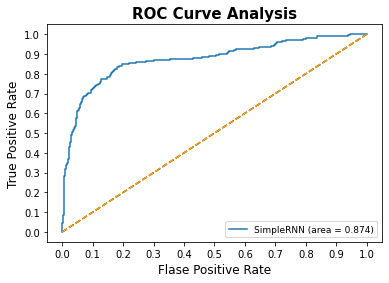

In [ ]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='SimpleRNN (area = {:.3f})'.format(auc_keras))

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=12)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=12)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':9}, loc='lower right')

plt.show()
#plt.savefig(".jpg")

In [ ]:
y_pred_binary = []

In [ ]:
for pred in y_pred:
    if pred > 0.5:
        y_pred_binary.append(1)
    else:
        y_pred_binary.append(0)

In [ ]:
print(classification_report(output_test, y_pred_binary, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       747
           1       0.75      0.61      0.67       273

    accuracy                           0.84      1020
   macro avg       0.81      0.77      0.78      1020
weighted avg       0.84      0.84      0.84      1020



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix , f1_score, precision_score, recall_score

print(precision_score(output_test, y_pred_binary , average="macro"))
print(recall_score(output_test, y_pred_binary , average="macro"))
print(f1_score(output_test, y_pred_binary , average="macro"))

tn, fp, fn, tp = confusion_matrix(output_test, y_pred_binary).ravel()
(tn, fp, fn, tp)

0.8079400892359803
0.7683775394618768
0.7842324084907237


(691, 56, 106, 167)